In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('bmh')

import plots
plots.plot_width = 10

# plots to draw in do_plots_all()
all_plots = ['select_real', 'store_real',
             'obj_select_real', 'obj_last_insert_real',
             'obj_insert_real', 'obj_store',
             'src_select_real', 'src_insert_real',
             'fsrc_select_real', 'fsrc_insert_real']
whiskers = 4.


# Test with Cassandra, three replicas

- JIRA ticket: https://jira.lsstcorp.org/browse/DM-25055


Approx 190k visits:
- Three nodes, three replicas
- All nodes have 256 tokens

In [2]:
data_files_cass3 = [
    "data/DM-25055/apdb-pdac-cass3-20200525T192437.csv.gz",
    "data/DM-25055/apdb-pdac-cass3-20200526T060900.csv.gz",
    "data/DM-25055/apdb-pdac-cass3-20200526T163853.csv.gz",
    "data/DM-25055/apdb-pdac-cass3-20200526T181133.csv.gz",
    "data/DM-25055/apdb-pdac-cass3-20200527T040254.csv.gz",
    "data/DM-25055/apdb-pdac-cass3-20200527T142547.csv.gz",
    "data/DM-25055/apdb-pdac-cass3-20200528T012035.csv.gz",
    "data/DM-25055/apdb-pdac-cass3-20200528T124414.csv.gz",
    "data/DM-25055/apdb-pdac-cass3-20200529T003601.csv.gz",
    "data/DM-25055/apdb-pdac-cass3-20200529T125859.csv.gz",
    "data/DM-25055/apdb-pdac-cass3-20200530T015106.csv.gz",
    "data/DM-25055/apdb-pdac-cass3-20200530T150931.csv.gz",
    "data/DM-25055/apdb-pdac-cass3-20200531T045940.csv.gz",
    "data/DM-25055/apdb-pdac-cass3-20200601T082615.csv.gz",
    "data/DM-25055/apdb-pdac-cass3-20200601T203507.csv.gz",
    "data/DM-25055/apdb-pdac-cass3-20200603T092818.csv.gz",
    "data/DM-25055/apdb-pdac-cass3-20200603T223808.csv.gz",
    "data/DM-25055/apdb-pdac-cass3-20200604T134706.csv.gz",
    "data/DM-25055/apdb-pdac-cass3-20200605T085649.csv.gz",
    "data/DM-25055/apdb-pdac-cass3-20200605T235830.csv.gz",
]

In [3]:
frames = [plots._read_csv(file, filter_count=False)[0] for file in data_files_cass3]

In [4]:
df_cass3 = pd.concat(frames)
del frames
# strip visits that did not measure read time
df_cass3 = df_cass3[(df_cass3.index % 1000) < 100]

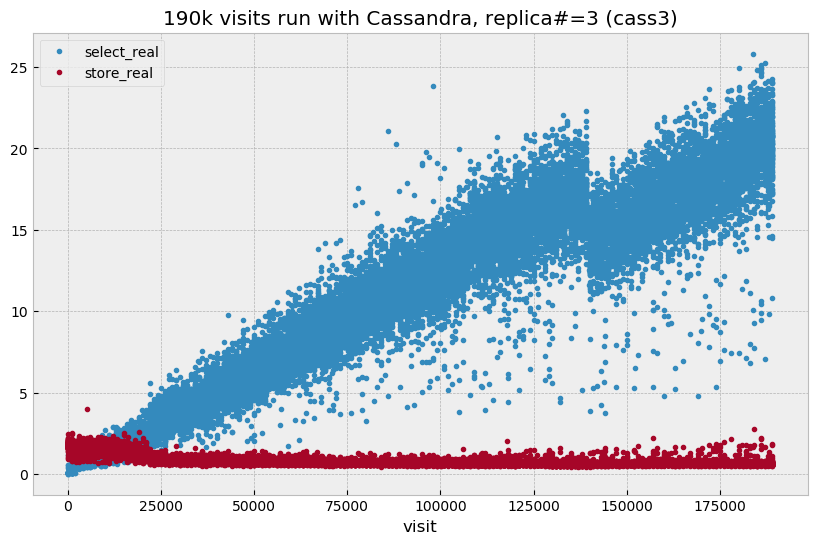

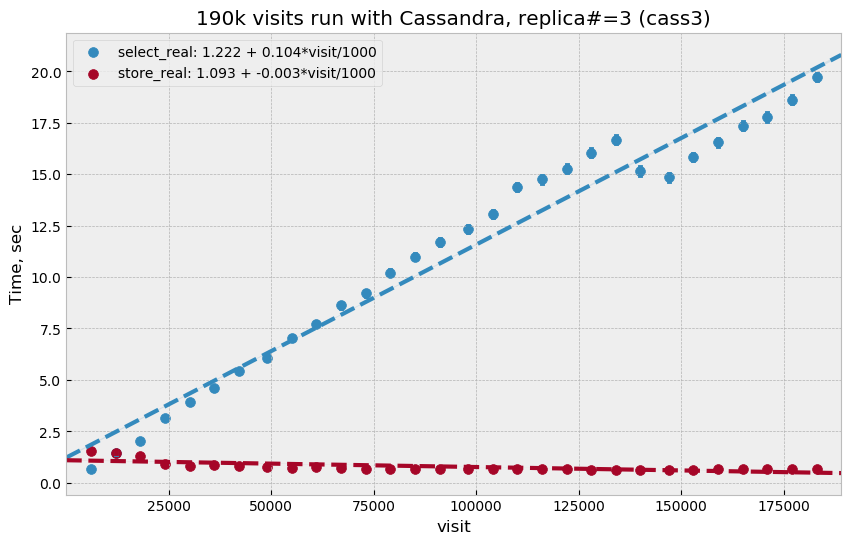

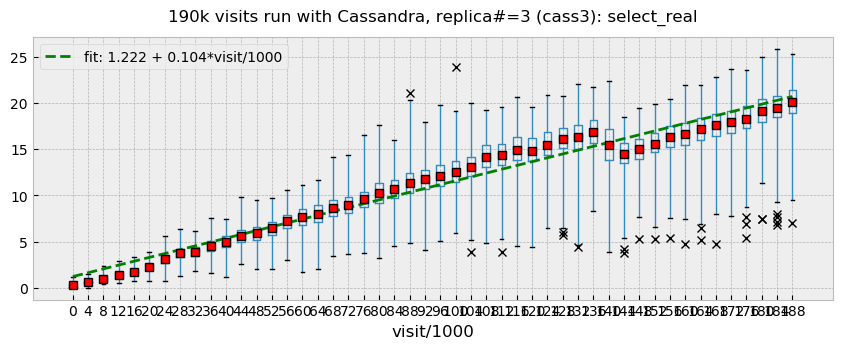

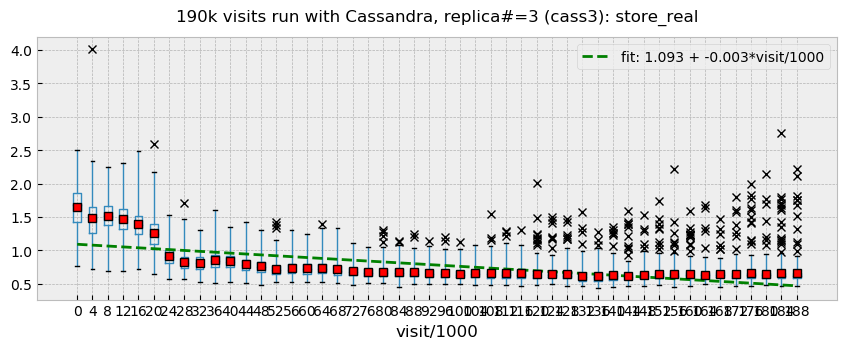

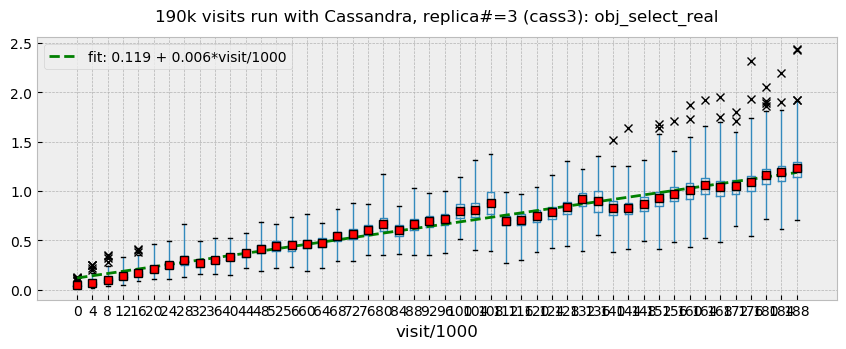

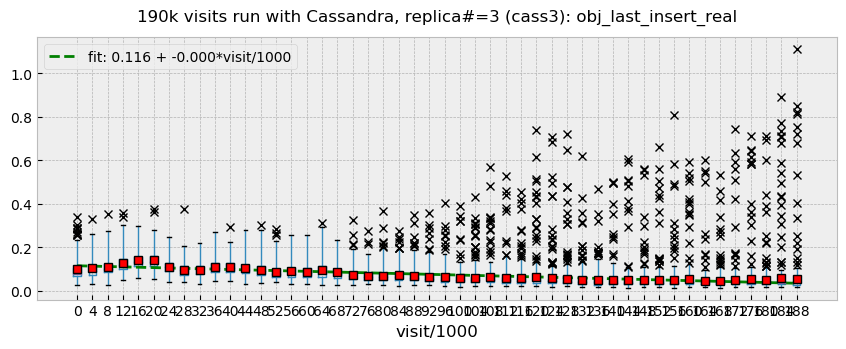

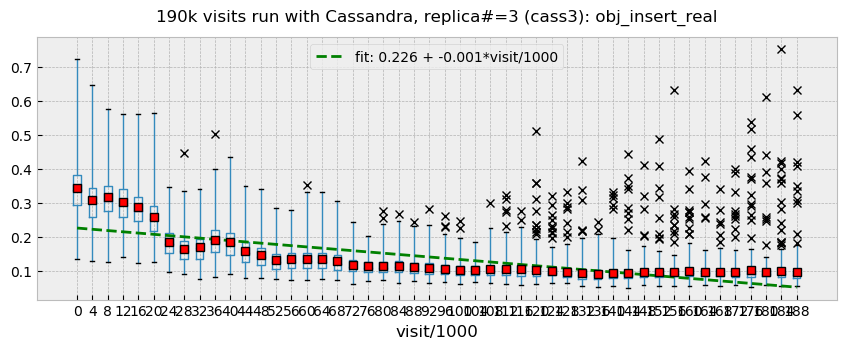

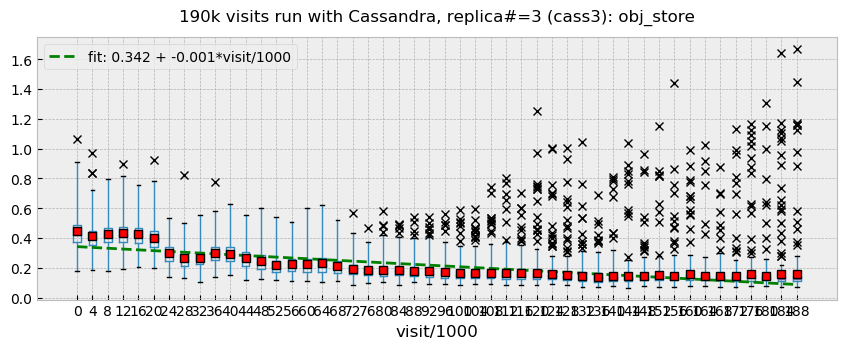

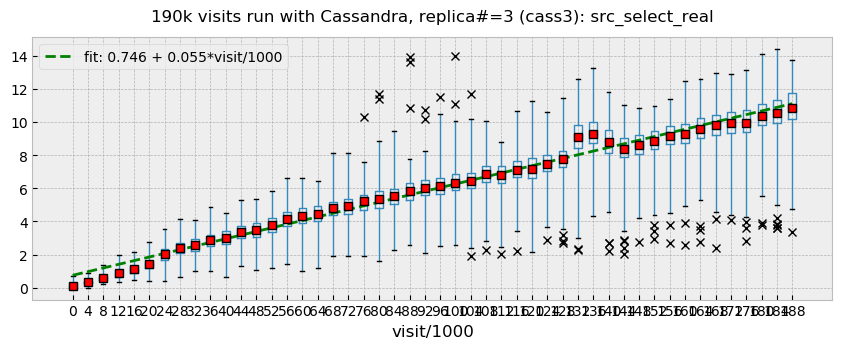

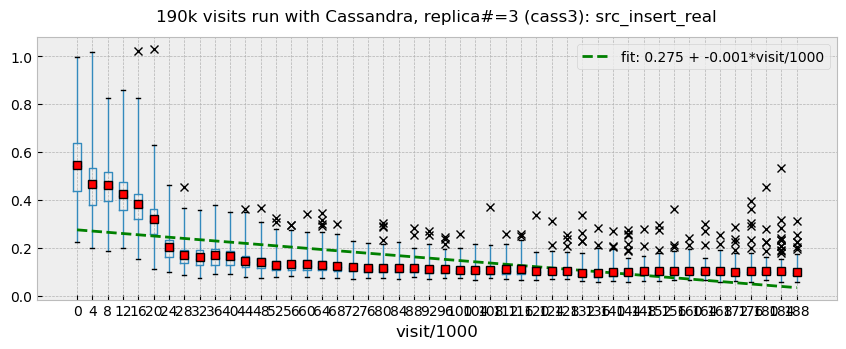

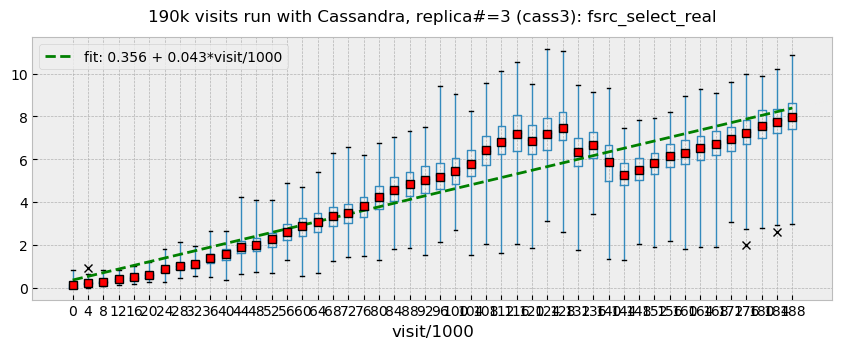

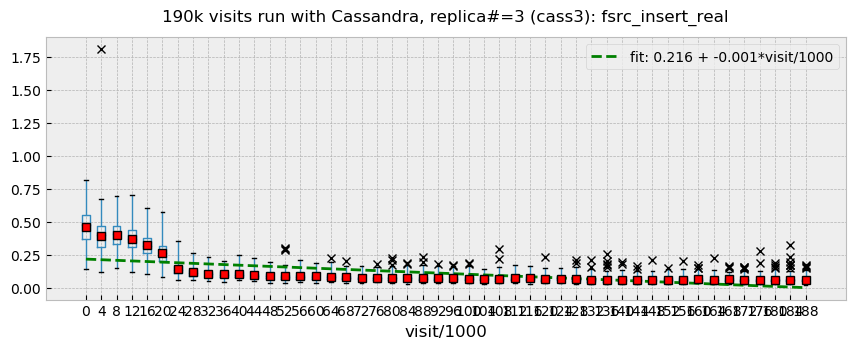

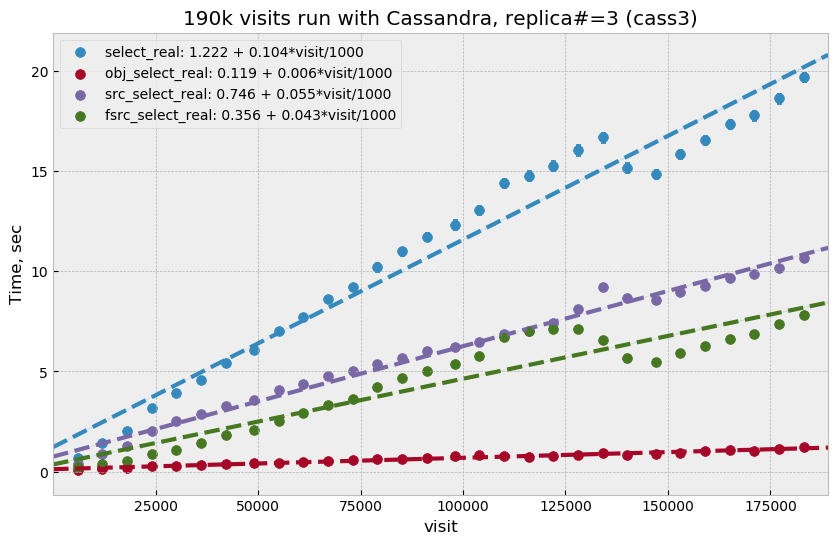

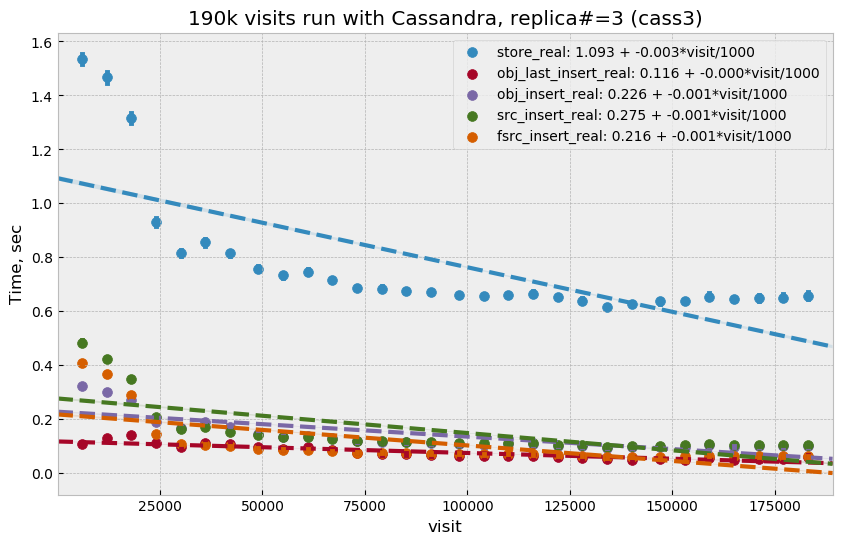

In [5]:
title = "190k visits run with Cassandra, replica#=3 (cass3)"
plots.do_plots_all(df_cass3, title, bin=4000, plots=all_plots, whis=whiskers);

## Test with cassandra, three replicas, RAID0

In [6]:
data_files_cass4 = [
    "data/DM-25055/apdb-pdac-cass4-20200608T162255.csv.gz",
    "data/DM-25055/apdb-pdac-cass4-20200608T225748.csv.gz",
    "data/DM-25055/apdb-pdac-cass4-20200609T062149.csv.gz",
    "data/DM-25055/apdb-pdac-cass4-20200609T143546.csv.gz",
    "data/DM-25055/apdb-pdac-cass4-20200609T232247.csv.gz",
    "data/DM-25055/apdb-pdac-cass4-20200610T084528.csv.gz",
    "data/DM-25055/apdb-pdac-cass4-20200610T184027.csv.gz",
    "data/DM-25055/apdb-pdac-cass4-20200611T050542.csv.gz",
    "data/DM-25055/apdb-pdac-cass4-20200611T160308.csv.gz",
    "data/DM-25055/apdb-pdac-cass4-20200612T033726.csv.gz",
    "data/DM-25055/apdb-pdac-cass4-20200612T154249.csv.gz",
    "data/DM-25055/apdb-pdac-cass4-20200613T042828.csv.gz",
    "data/DM-25055/apdb-pdac-cass4-20200613T172058.csv.gz",
    "data/DM-25055/apdb-pdac-cass4-20200614T065053.csv.gz",
    "data/DM-25055/apdb-pdac-cass4-20200614T205425.csv.gz",
    "data/DM-25055/apdb-pdac-cass4-20200615T112437.csv.gz",
    "data/DM-25055/apdb-pdac-cass4-20200616T023321.csv.gz",
    "data/DM-25055/apdb-pdac-cass4-20200616T181335.csv.gz",
    "data/DM-25055/apdb-pdac-cass4-20200618T060140.csv.gz",
]

In [7]:
frames = [plots._read_csv(file, filter_count=False)[0] for file in data_files_cass4]
df_cass4 = pd.concat(frames)
del frames
# strip visits that did not measure read time
df_cass4 = df_cass4[(df_cass4.index % 1000) < 100]
df_cass4_quorum = df_cass4[df_cass4.index <= 180000].copy()
df_cass4_one = df_cass4[df_cass4.index > 180000].copy()


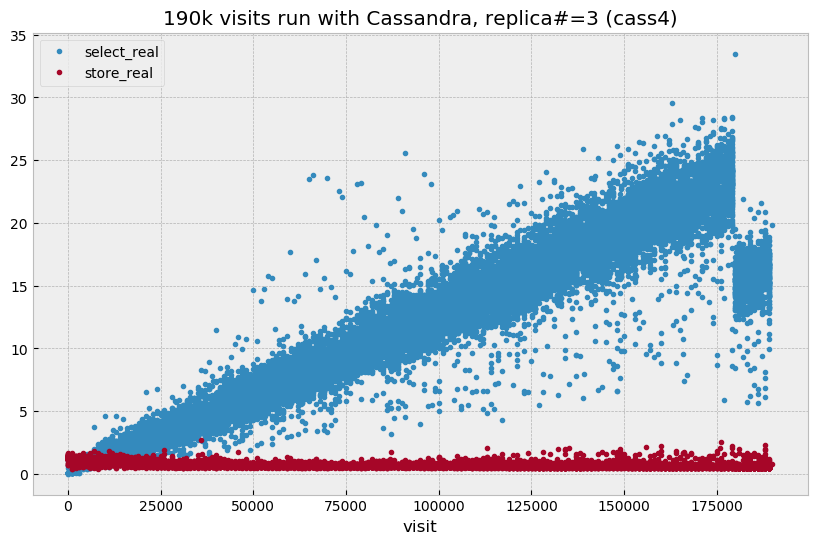

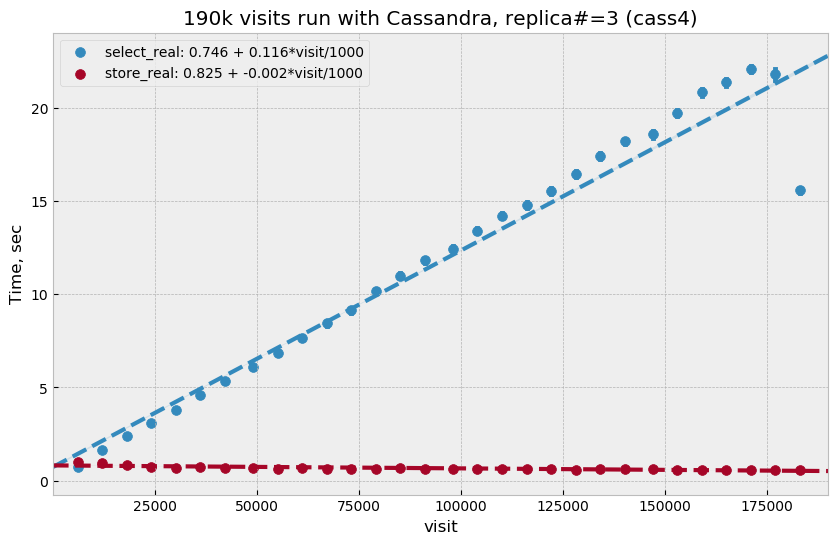

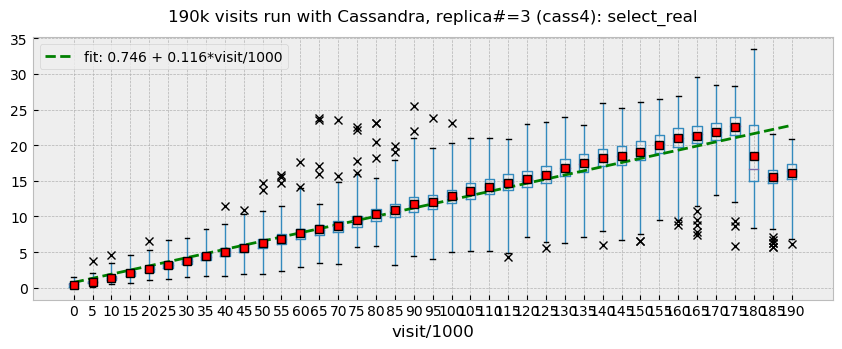

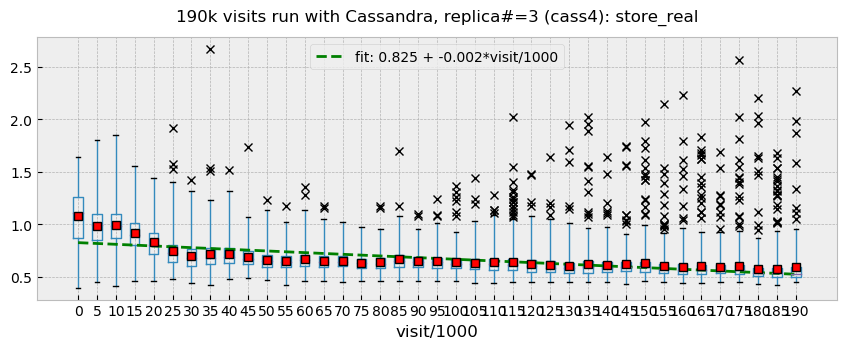

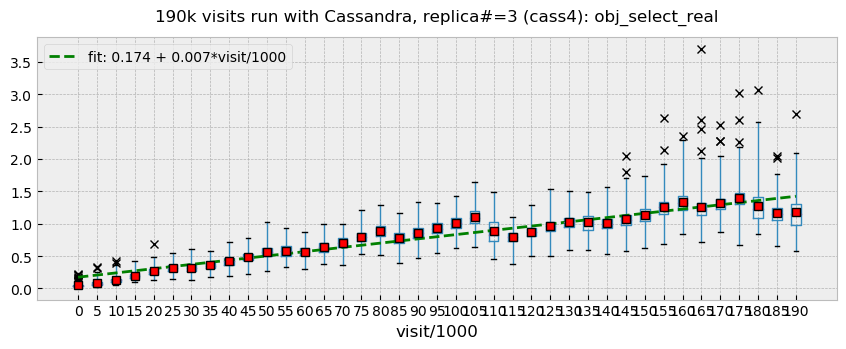

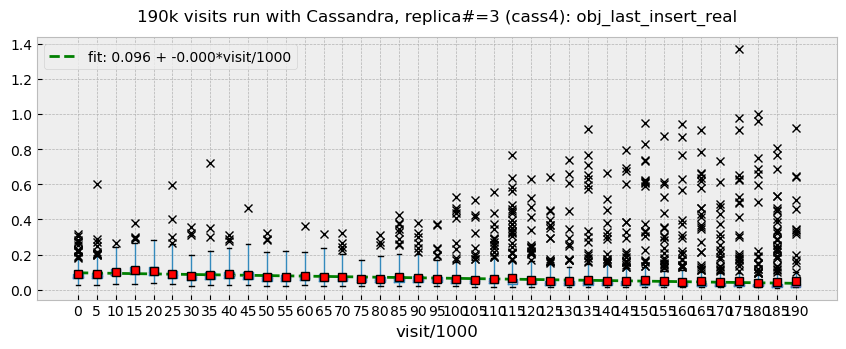

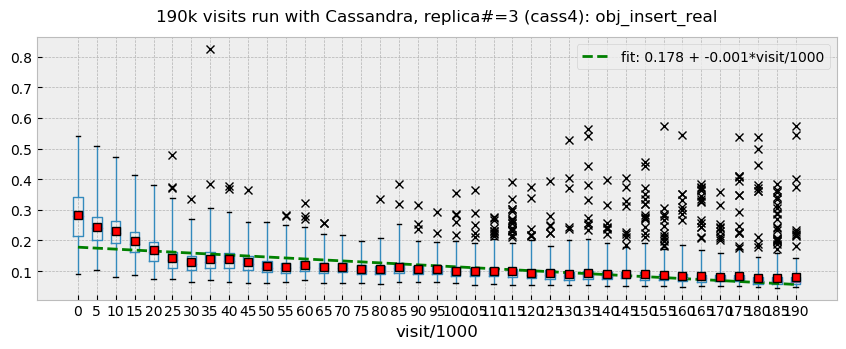

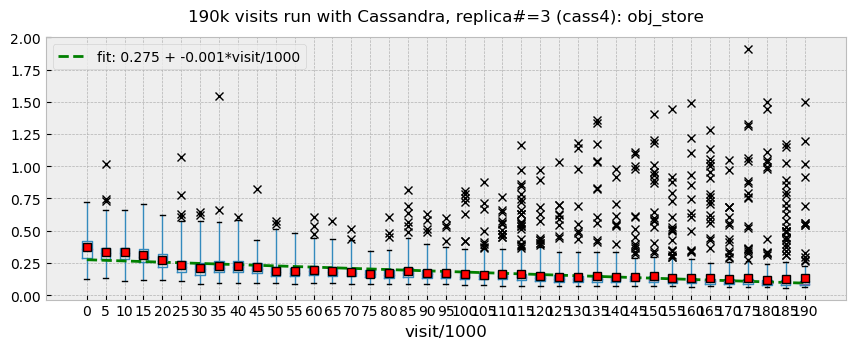

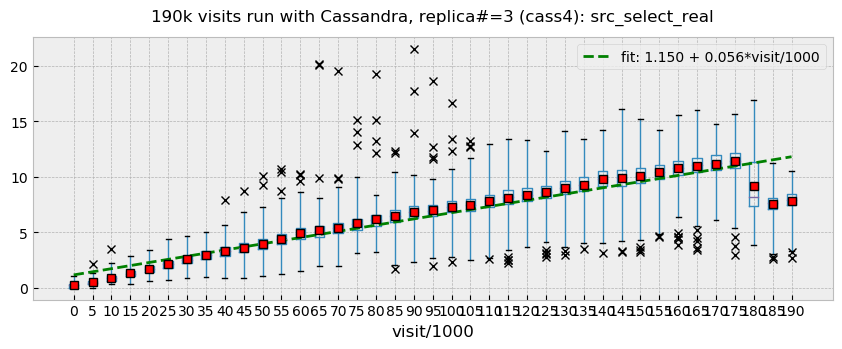

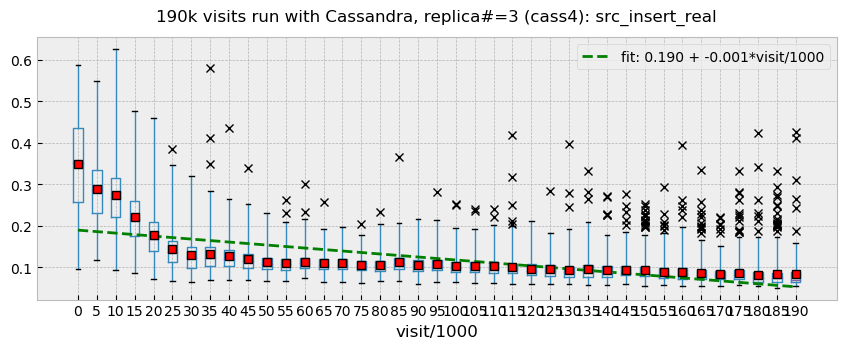

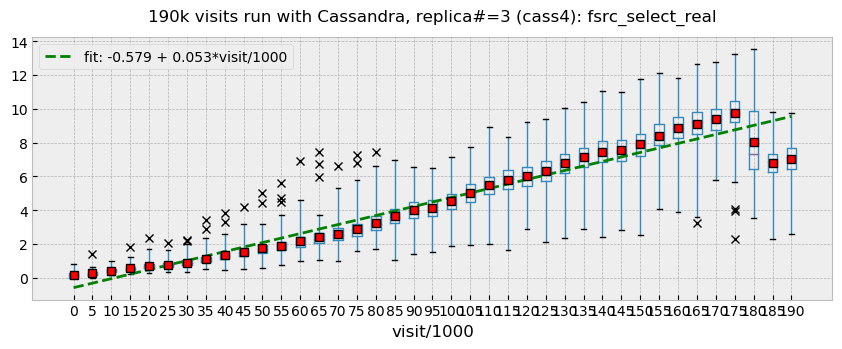

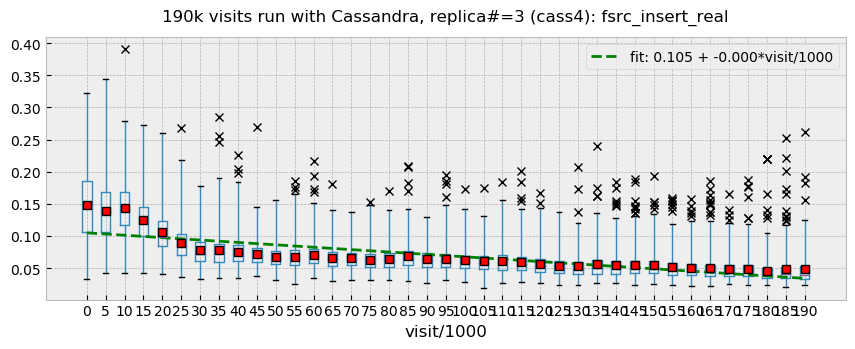

In [8]:
title = "190k visits run with Cassandra, replica#=3 (cass4)"
plots.do_plots_all(df_cass4, title, bin=5000, plots=all_plots, whis=whiskers, fits=[]);

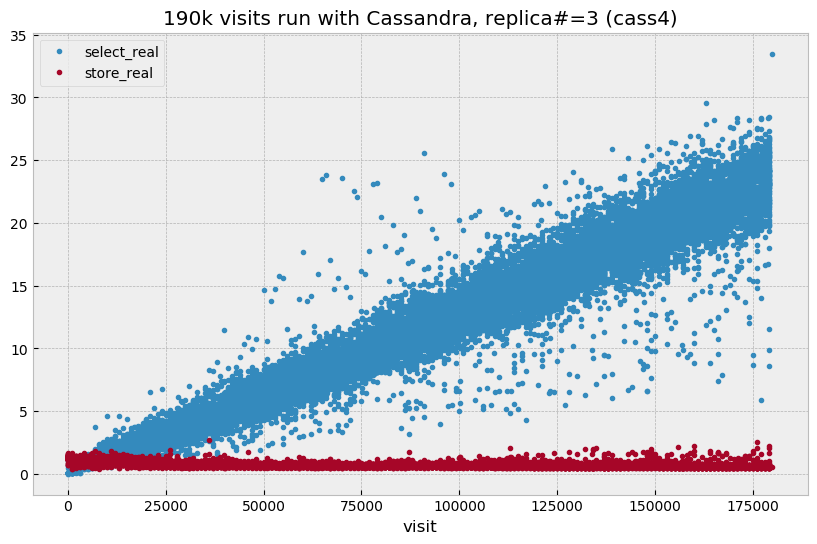

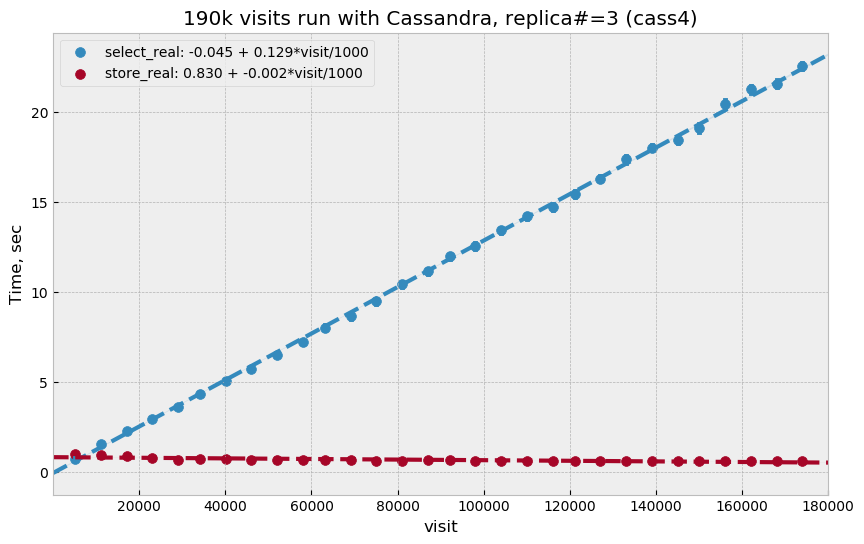

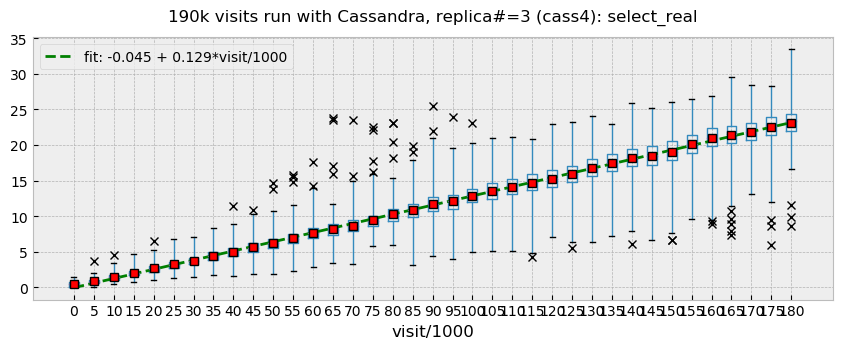

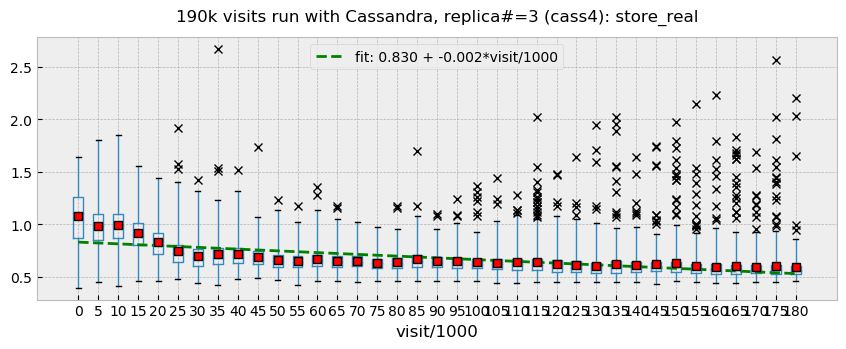

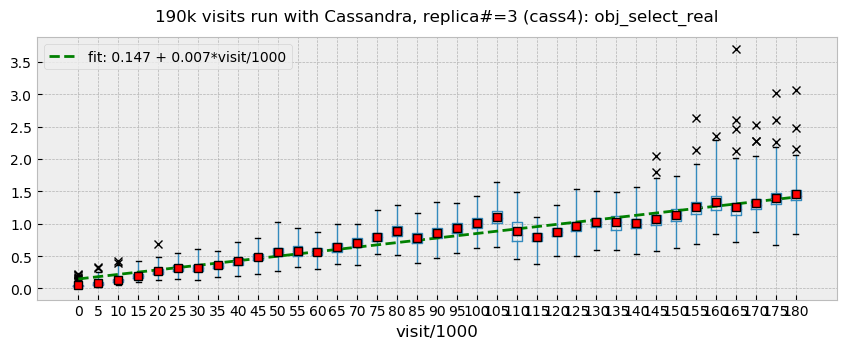

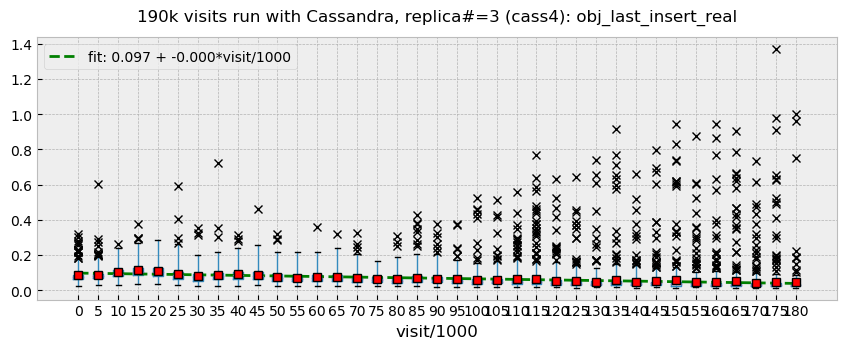

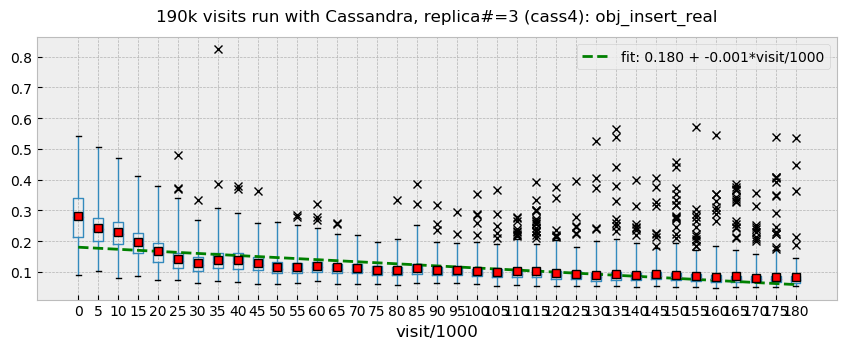

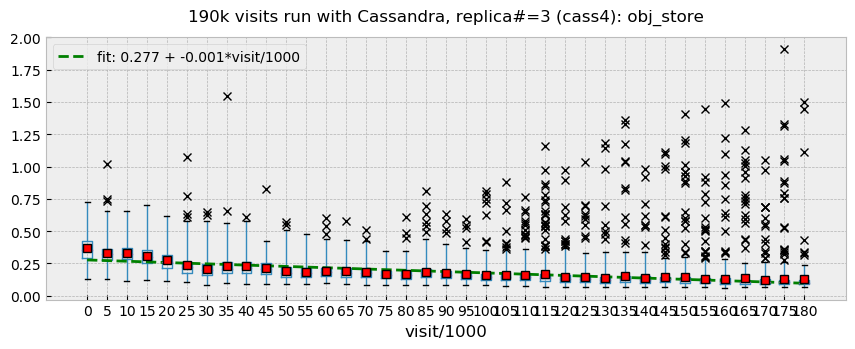

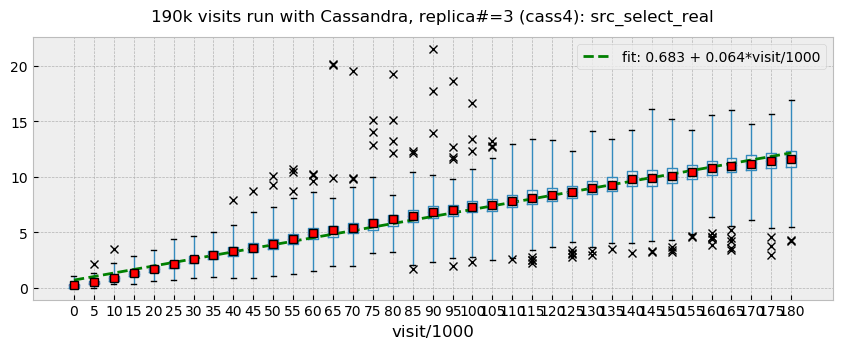

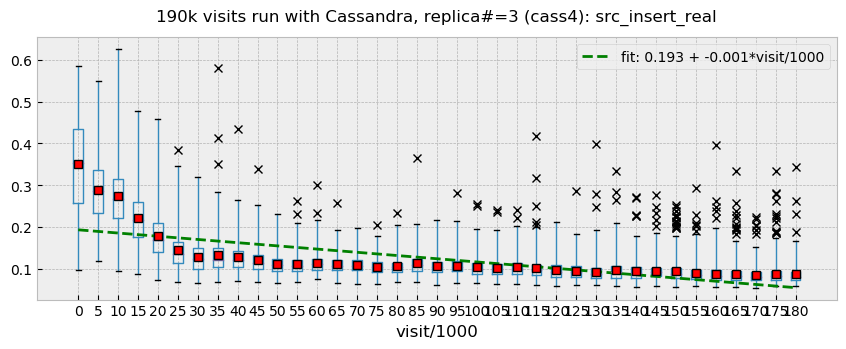

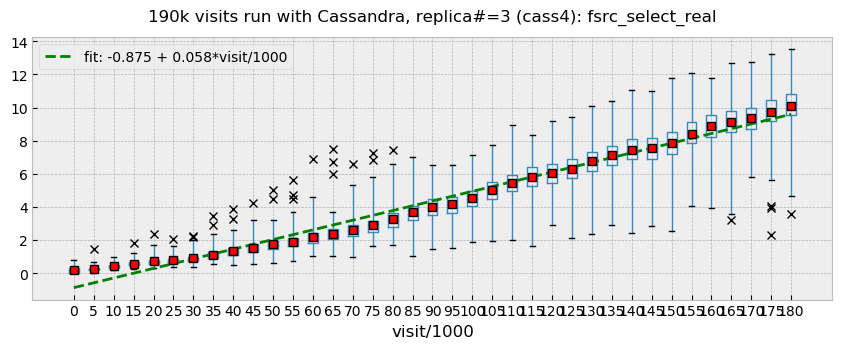

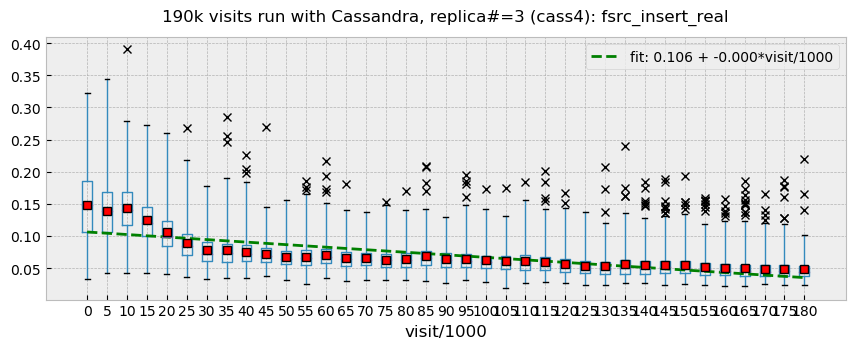

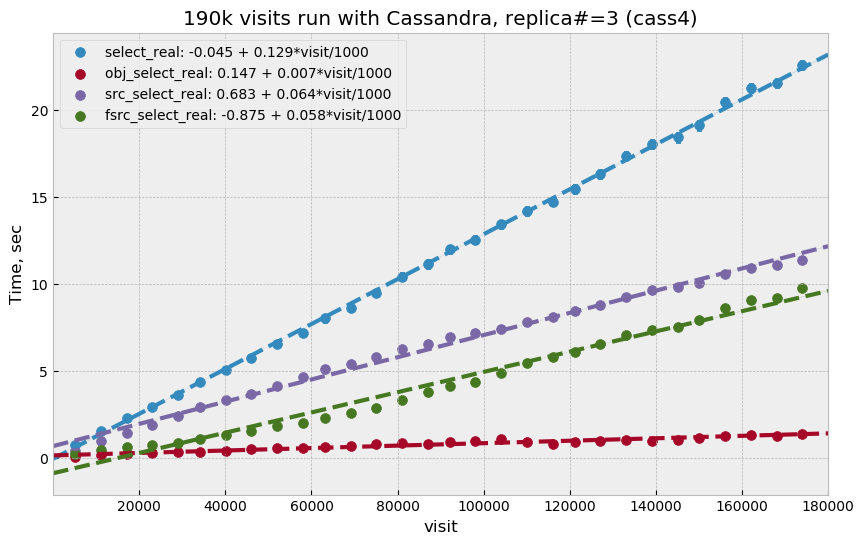

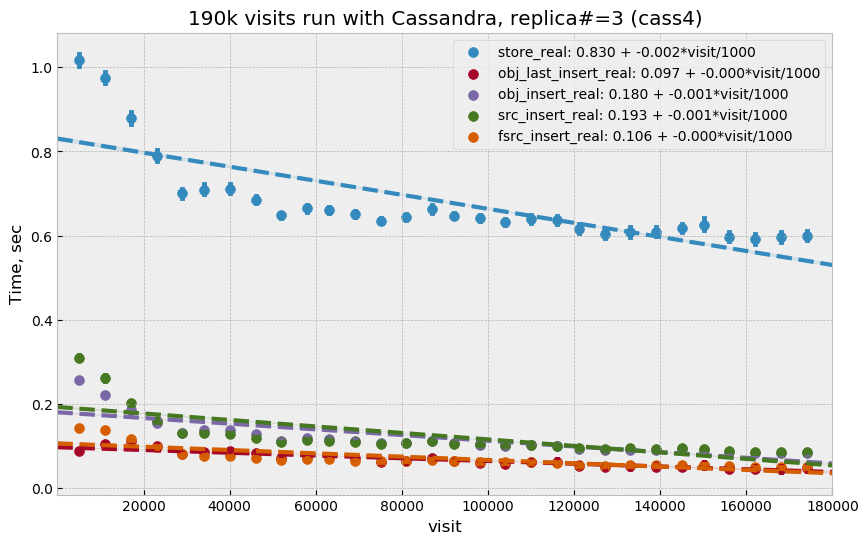

In [9]:
plots.do_plots_all(df_cass4_quorum, title, bin=5000, plots=all_plots, whis=whiskers);

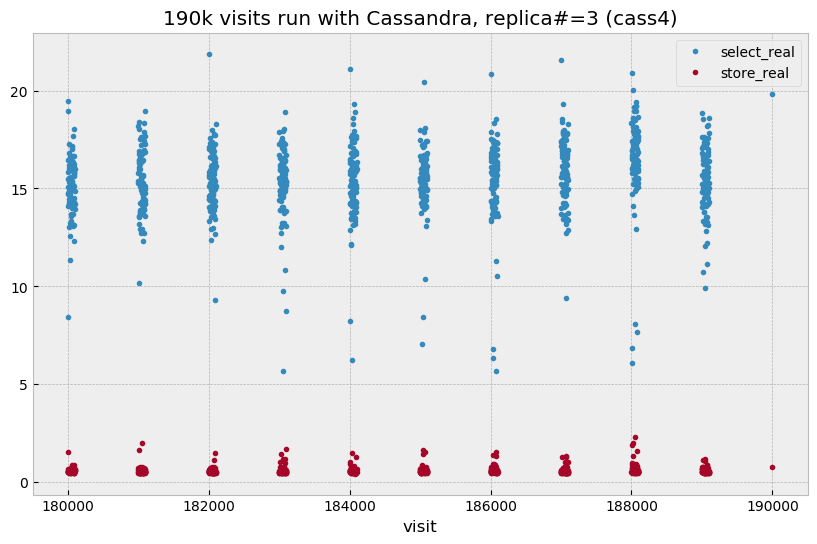

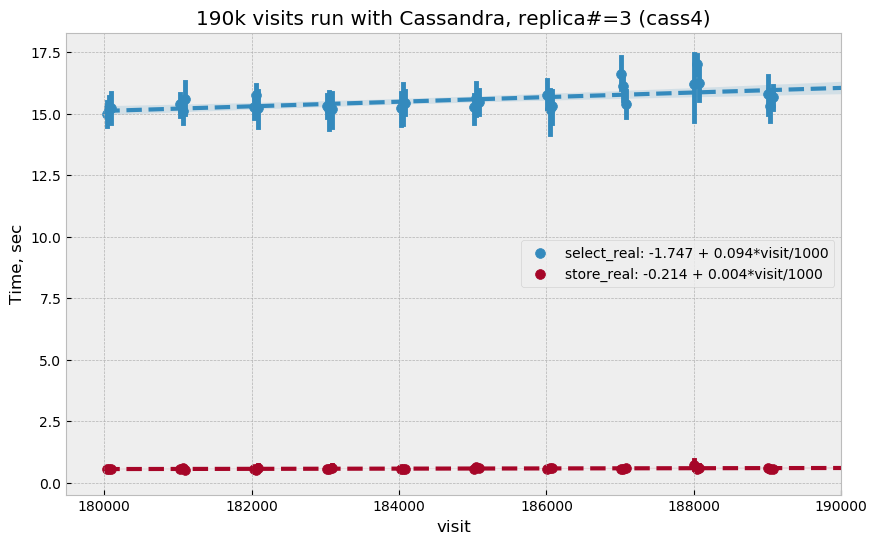

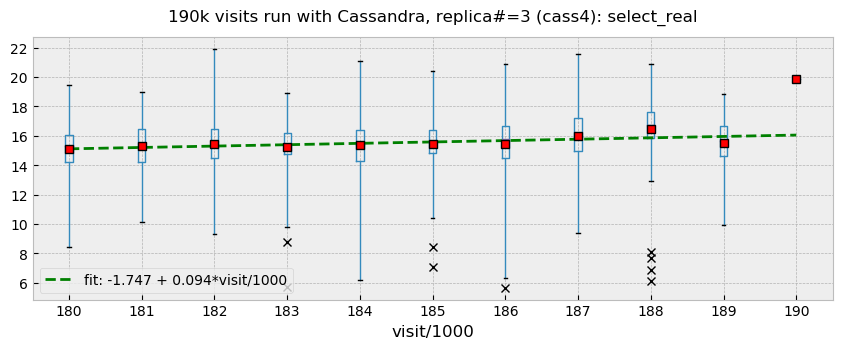

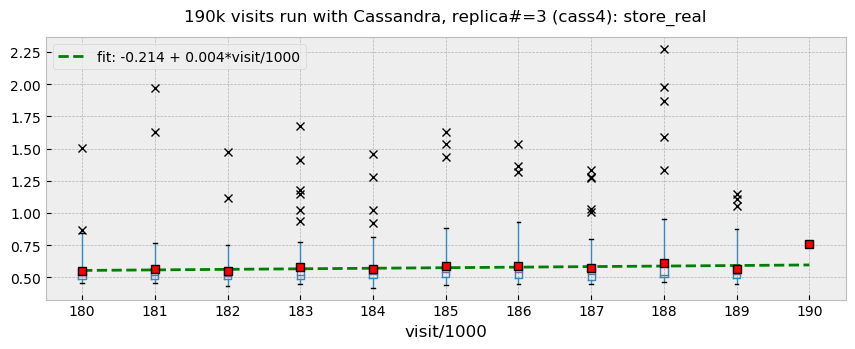

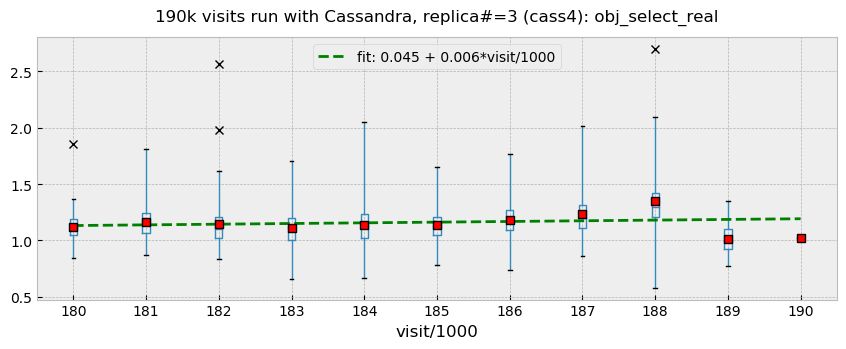

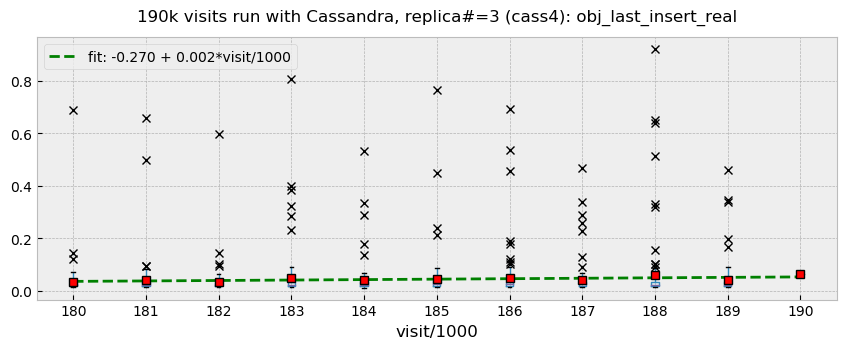

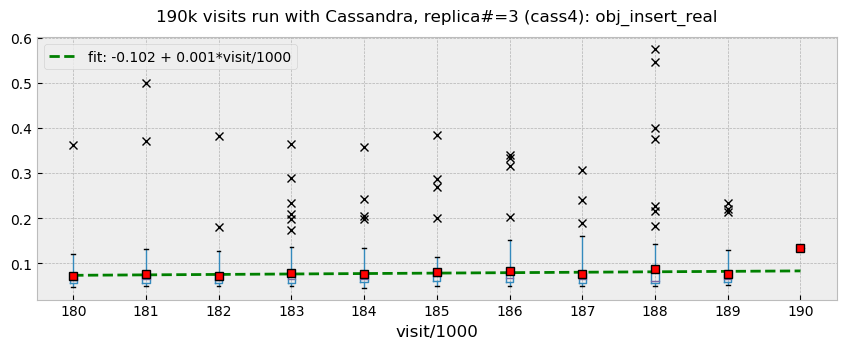

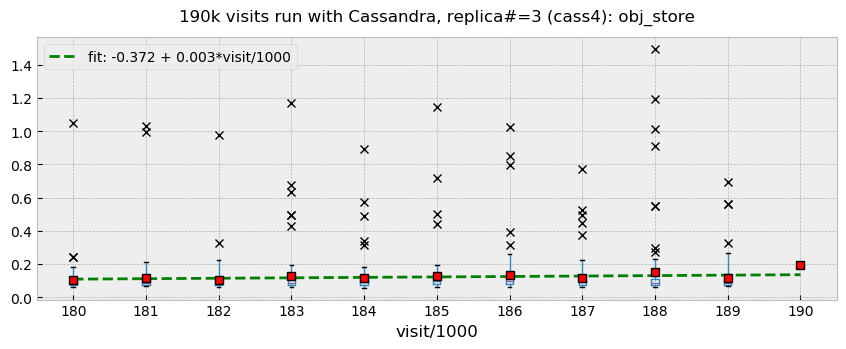

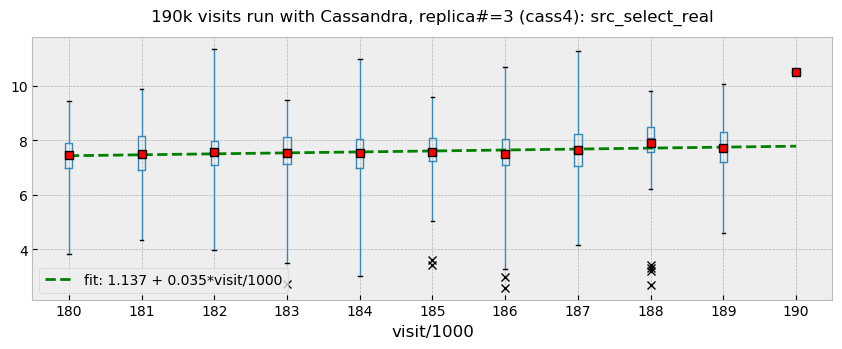

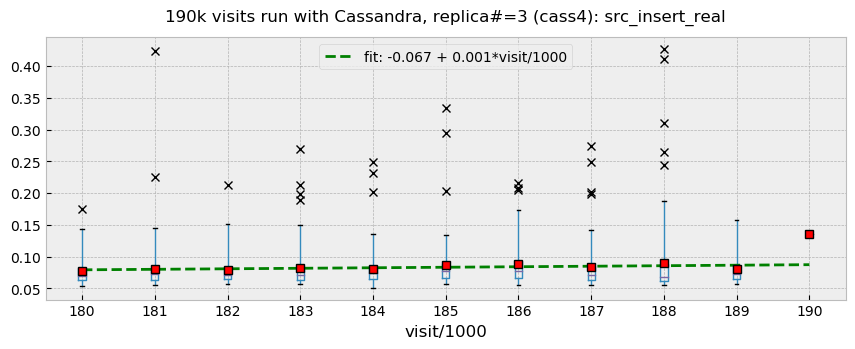

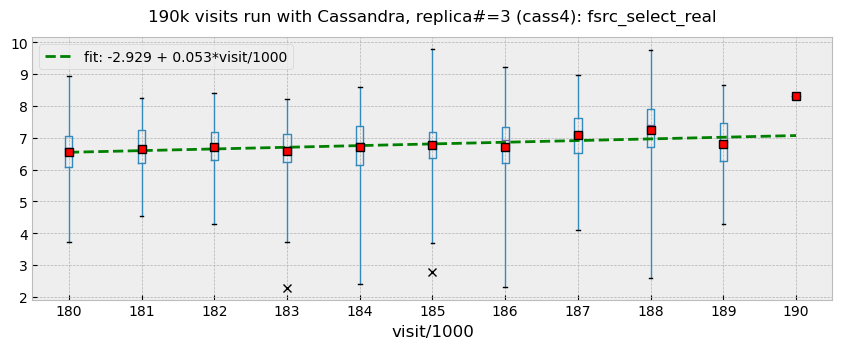

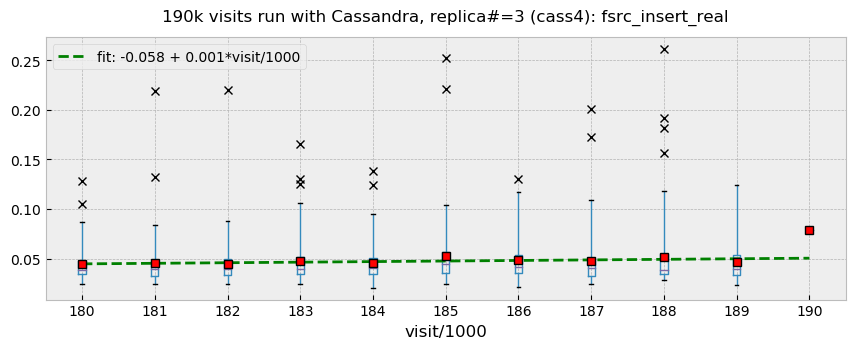

In [10]:
plots.do_plots_all(df_cass4_one, title, bin=200, plots=all_plots, whis=whiskers, fits=[]);

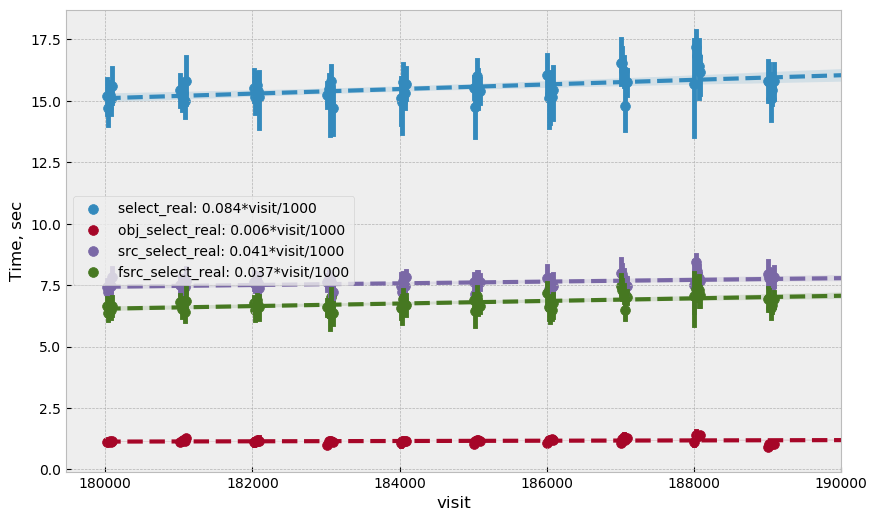

In [11]:
plots.plot_fit_times(
    df_cass4_one,
    ['select_real', 'obj_select_real', 'src_select_real', 'fsrc_select_real'],
    mode='lin',
    nbins=50,
)